In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [ ]:
data = pd.read_csv("Modify_World_Oil_price.csv")
data

,Date,Open,High,Low,Close,Volume
0,2015-01-02,53.759998,55.110001,52.029999,52.689999,268708.0
1,2015-01-05,52.610001,52.730000,49.680000,50.040001,375782.0
2,2015-01-06,50.000000,50.369999,47.549999,47.930000,451642.0
3,2015-01-07,48.000000,49.310001,46.830002,48.650002,460083.0
4,2015-01-08,48.779999,49.650002,47.730000,48.790001,362081.0
...,...,...,...,...,...,...
2509,2024-12-24,69.559998,70.430000,69.360001,70.099998,122602.0
2510,2024-12-26,70.199997,70.750000,69.330002,69.620003,144877.0
2511,2024-12-27,69.680000,70.750000,69.440002,70.599998,172641.0
2512,2024-12-30,70.419998,71.559998,70.120003,70.989998,199296.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
x = data[(data['Low'] < 10)].index
data.drop(x, inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,53.759998,55.110001,52.029999,52.689999,268708.0
2015-01-05,52.610001,52.730000,49.680000,50.040001,375782.0
2015-01-06,50.000000,50.369999,47.549999,47.930000,451642.0
2015-01-07,48.000000,49.310001,46.830002,48.650002,460083.0
2015-01-08,48.779999,49.650002,47.730000,48.790001,362081.0
...,...,...,...,...,...
2024-12-24,69.559998,70.430000,69.360001,70.099998,122602.0
2024-12-26,70.199997,70.750000,69.330002,69.620003,144877.0
2024-12-27,69.680000,70.750000,69.440002,70.599998,172641.0


In [5]:
new_data = data.loc['2024/1/1':'2025/1/1']

In [6]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(new_data['Close'])

print('ADF Statistics:', results[0])
print('ADF p-value:', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print(f" {key}: {value}")
    
if results[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')


ADF Statistics: -2.1375813004758766
ADF p-value: 0.22967384548301795
Critical Values:
 1%: -3.4566744514553016
 5%: -2.8731248767783426
 10%: -2.5729436702592023
accept H0 (non-stationary)


In [7]:
new_data['Price_diff'] = new_data['Close'].diff()
new_data = new_data.dropna(subset=['Price_diff'])
result_diff = adfuller(new_data['Price_diff'])

print("ADF Statistic (Diff):", result_diff[0])
print("p-value (Diff):", result_diff[1])
print("Critical Values (Diff):")
for key, value in result_diff[4].items():
    print(f" {key}: {value}")
    
if result_diff[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')

ADF Statistic (Diff): -8.544603108781335
p-value (Diff): 9.578351583868222e-14
Critical Values (Diff):
 1%: -3.457215237265747
 5%: -2.873361841566324
 10%: -2.5730700760129555
reject H0


C:\Users\2023\AppData\Local\Temp\ipykernel_12460\840218419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Price_diff'] = new_data['Close'].diff()


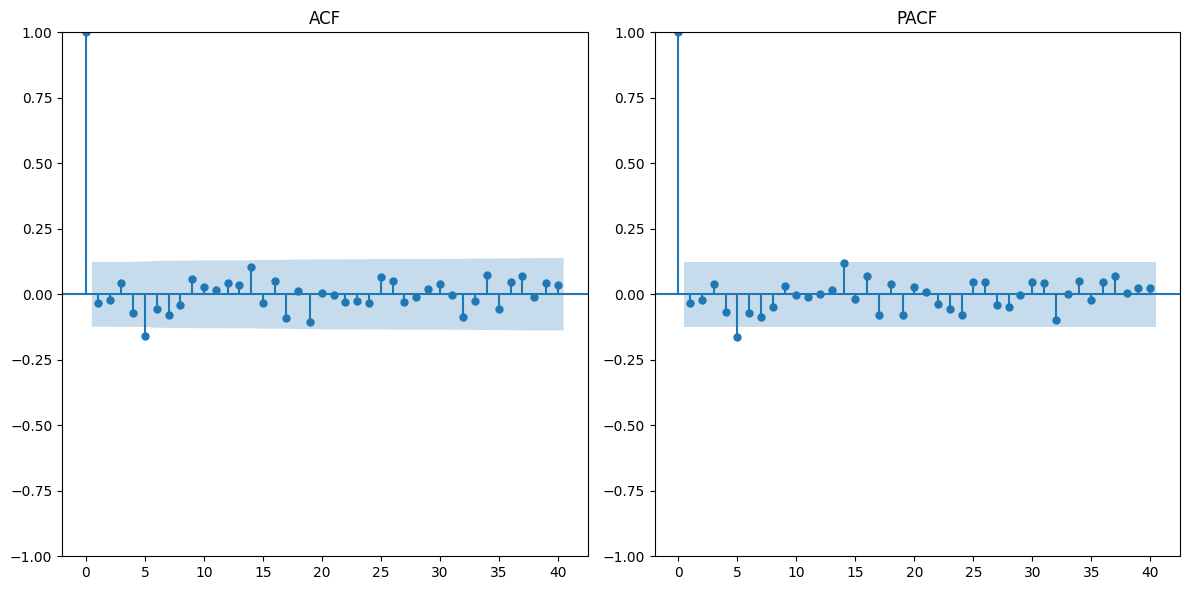

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(new_data['Price_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF')

plt.subplot(1, 2, 2)
plot_pacf(new_data['Price_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

In [9]:
import itertools 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

p = range(0, 7)
d = [1]
q = range(0, 7)
pdq_combinations = list(itertools.product(p, d, q))

results = []

for param in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(new_data['Price_diff'].dropna(), order=param)
        result = model.fit()
        results.append((param, result.aic, result.bic))
        print(f'ARIMA{param} - AIC: {result.aic:.2f} - BIC: {result.bic:.2f}')
    except:
        continue
        
best_model = sorted(results, key=lambda x: x[1])[0]
print(f"best model: \n ARIMA{best_model[0]} - AIC: {best_model[1]:.2f}, BIC: {best_model[2]:.2f}")

ARIMA(0, 1, 0) - AIC: 1044.51 - BIC: 1048.03
ARIMA(0, 1, 1) - AIC: 872.17 - BIC: 879.21
ARIMA(0, 1, 2) - AIC: 873.95 - BIC: 884.52
ARIMA(0, 1, 3) - AIC: 875.88 - BIC: 889.97
ARIMA(0, 1, 4) - AIC: 877.44 - BIC: 895.05
ARIMA(0, 1, 5) - AIC: 877.87 - BIC: 899.00
ARIMA(0, 1, 6) - AIC: 873.89 - BIC: 898.54
ARIMA(1, 1, 0) - AIC: 973.64 - BIC: 980.68
ARIMA(1, 1, 1) - AIC: 873.96 - BIC: 884.52
ARIMA(1, 1, 2) - AIC: 875.28 - BIC: 889.37
ARIMA(1, 1, 3) - AIC: 877.24 - BIC: 894.85
ARIMA(1, 1, 4) - AIC: 878.85 - BIC: 899.98
ARIMA(1, 1, 5) - AIC: 879.73 - BIC: 904.38
ARIMA(1, 1, 6) - AIC: 878.55 - BIC: 906.72
ARIMA(2, 1, 0) - AIC: 937.16 - BIC: 947.72
ARIMA(2, 1, 1) - AIC: 875.87 - BIC: 889.96
ARIMA(2, 1, 2) - AIC: 877.24 - BIC: 894.85
ARIMA(2, 1, 3) - AIC: 876.49 - BIC: 897.62
ARIMA(2, 1, 4) - AIC: 879.64 - BIC: 904.29
ARIMA(2, 1, 5) - AIC: 880.65 - BIC: 908.82
ARIMA(2, 1, 6) - AIC: 882.59 - BIC: 914.28
ARIMA(3, 1, 0) - AIC: 930.37 - BIC: 944.46
ARIMA(3, 1, 1) - AIC: 877.36 - BIC: 894.97
ARIMA(3, 

In [10]:
train_size = int(len(new_data['Price_diff']) * 0.8)
train, test = new_data.iloc[:train_size], new_data.iloc[train_size:]

best_pdq = best_model[0]
model = sm.tsa.ARIMA(train['Price_diff'].dropna(), order=best_pdq)
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  200
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -349.667
Date:                Wed, 11 Jun 2025   AIC                            703.333
Time:                        11:07:55   BIC                            709.920
Sample:                             0   HQIC                           705.999
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9960      0.036    -27.848      0.000      -1.066      -0.926
sigma2         1.9217      0.198      9.714      0.000       1.534       2.309
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [11]:
train_size = int(len(new_data['Price_diff']) * 0.8)
train, test = new_data.iloc[:train_size], new_data.iloc[train_size:]

forecast = result.forecast(steps=len(test))
final_forecast = forecast + new_data['Close'][-1]
print(final_forecast)

200    71.712482
201    71.712482
202    71.712482
203    71.712482
204    71.712482
205    71.712482
206    71.712482
207    71.712482
208    71.712482
209    71.712482
210    71.712482
211    71.712482
212    71.712482
213    71.712482
214    71.712482
215    71.712482
216    71.712482
217    71.712482
218    71.712482
219    71.712482
220    71.712482
221    71.712482
222    71.712482
223    71.712482
224    71.712482
225    71.712482
226    71.712482
227    71.712482
228    71.712482
229    71.712482
230    71.712482
231    71.712482
232    71.712482
233    71.712482
234    71.712482
235    71.712482
236    71.712482
237    71.712482
238    71.712482
239    71.712482
240    71.712482
241    71.712482
242    71.712482
243    71.712482
244    71.712482
245    71.712482
246    71.712482
247    71.712482
248    71.712482
249    71.712482
250    71.712482
Name: predicted_mean, dtype: float64


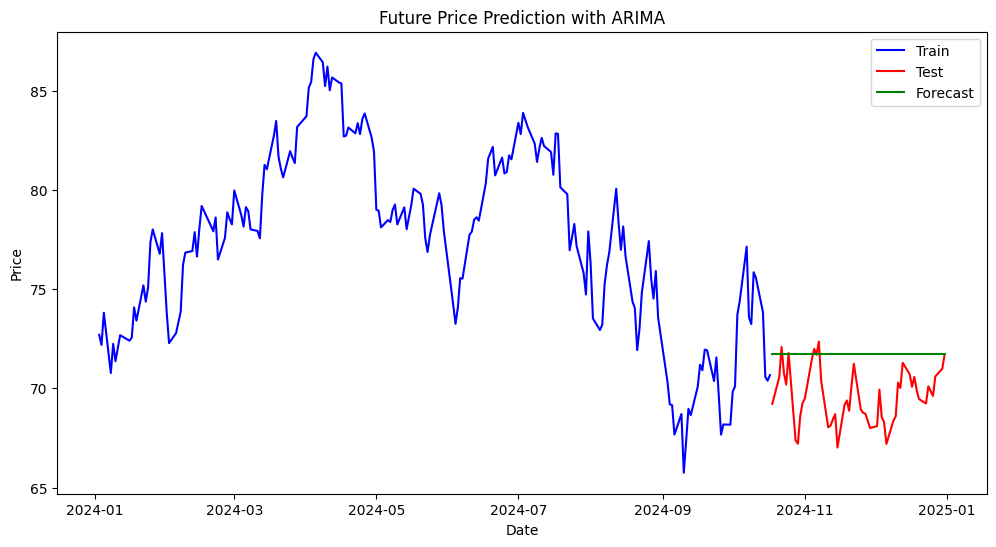

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, final_forecast, label='Forecast', color='green')
plt.legend()
plt.title('Future Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

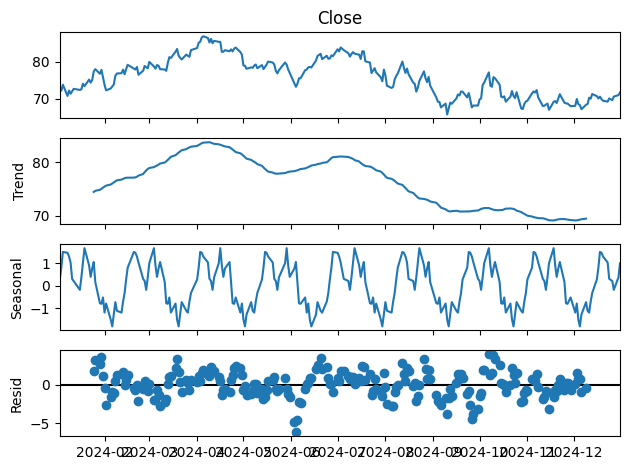

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(new_data['Close'], model='additive', period=30).plot()
plt.show()

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_2 = SARIMAX(new_data['Price_diff'], order=(0,1,1), seasonal_order=(0,1,1,30))
result_2 = model_2.fit()
print(result_2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Price_diff   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                -412.545
Date:                            Wed, 11 Jun 2025   AIC                            831.090
Time:                                    11:07:58   BIC                            841.271
Sample:                                         0   HQIC                           835.201
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      1.837     -0.544      0.586      -4.600       2.600
ma.S.L30      -0.8264      0.111   

In [15]:
forecast_2 = result_2.forecast(steps=len(test))
final_forecast_2 = forecast_2 + new_data['Close'][-1]
print(final_forecast_2)

251    72.436146
252    71.096436
253    70.973086
254    72.171322
255    71.954322
256    70.414198
257    70.518307
258    71.425428
259    71.816672
260    70.968655
261    72.205041
262    70.850767
263    71.294509
264    72.032553
265    72.190483
266    71.024248
267    71.873384
268    71.958985
269    72.225169
270    72.026410
271    71.811681
272    72.395859
273    71.075149
274    71.395722
275    71.277315
276    71.134685
277    71.475200
278    71.539642
279    72.138799
280    72.135513
281    72.407404
282    71.067694
283    70.944344
284    72.142580
285    71.925580
286    70.385456
287    70.489565
288    71.396686
289    71.787930
290    70.939913
291    72.176299
292    70.822025
293    71.265767
294    72.003811
295    72.161741
296    70.995506
297    71.844642
298    71.930243
299    72.196427
300    71.997668
301    71.782939
Name: predicted_mean, dtype: float64


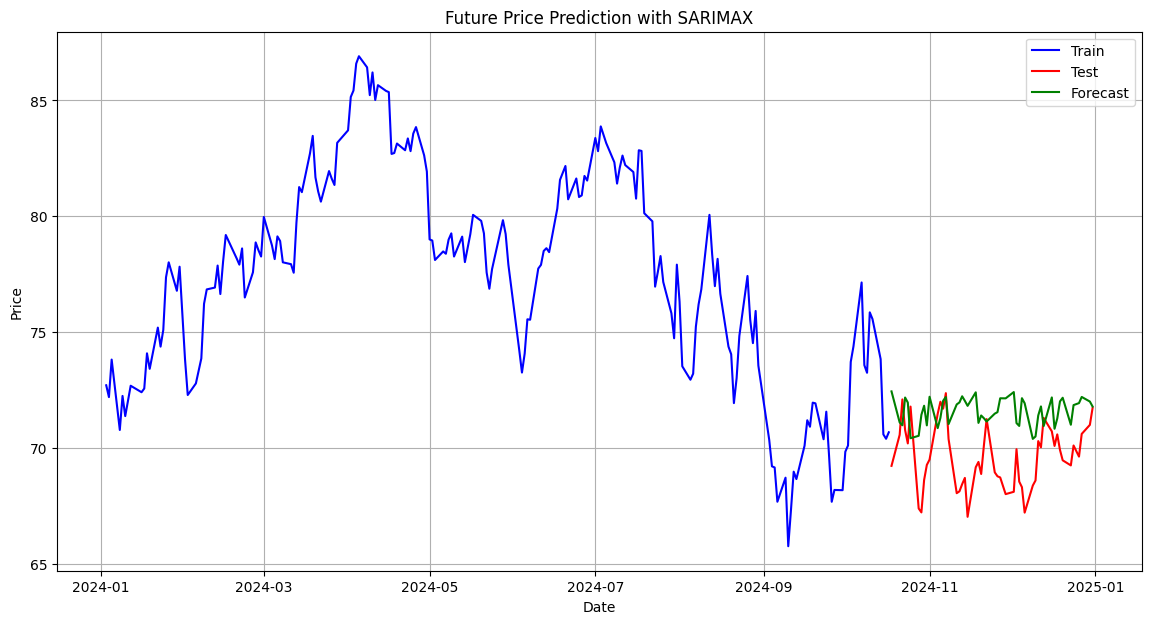

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, final_forecast_2, label='Forecast', color='green')
plt.legend()
plt.title('Future Price Prediction with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

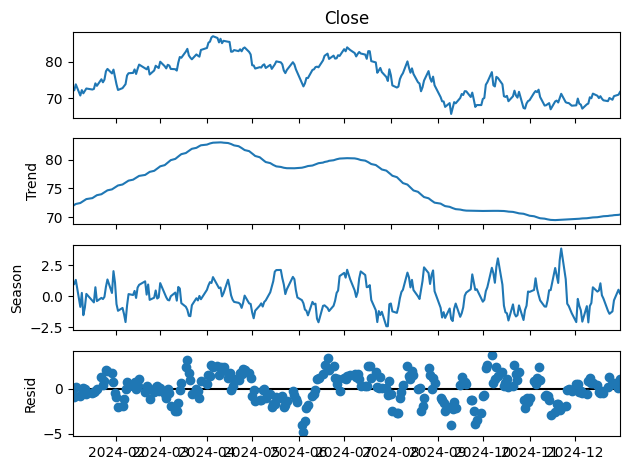

In [17]:
from statsmodels.tsa.seasonal import STL

stl = STL(new_data['Close'], period=30)
res = stl.fit()
res.plot()
plt.show()

Ljung_Box Test: 
      lb_stat  lb_pvalue
10  8.136443   0.615511
ARCH Test: - p-value: 0.0011
AR roots modulus: []
MA roots modulus: [1.00404073]


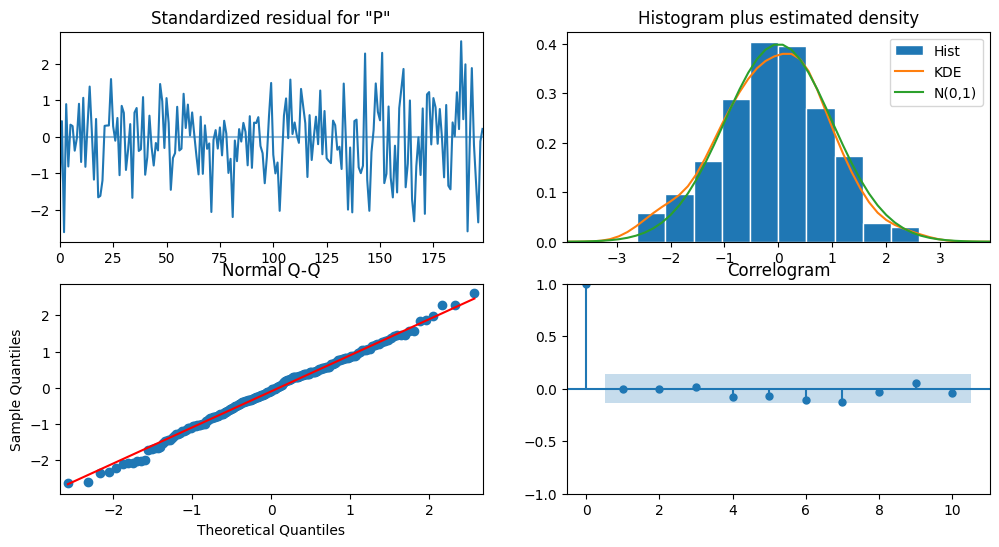

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(result.resid, lags=[10], return_df=True)
print("Ljung_Box Test: \n", ljung_box)

from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(result.resid)
print(f"ARCH Test: - p-value: {arch_test[1]:.4f}")

ar_roots = result.arroots
ma_roots = result.maroots
print("AR roots modulus:", abs(ar_roots))
print("MA roots modulus:", abs(ma_roots))

result.plot_diagnostics(figsize=(12, 6))
plt.show()

Ljung_Box Test: 
       lb_stat  lb_pvalue
10  25.870677   0.003918
ARCH Test: - p-value: 0.2061
AR roots modulus: []
MA roots modulus: [1.00637633 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633
 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633
 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633
 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633
 1.00637633 1.00637633 1.00637633 1.00637633 1.00637633 1.00025688
 1.00637633]


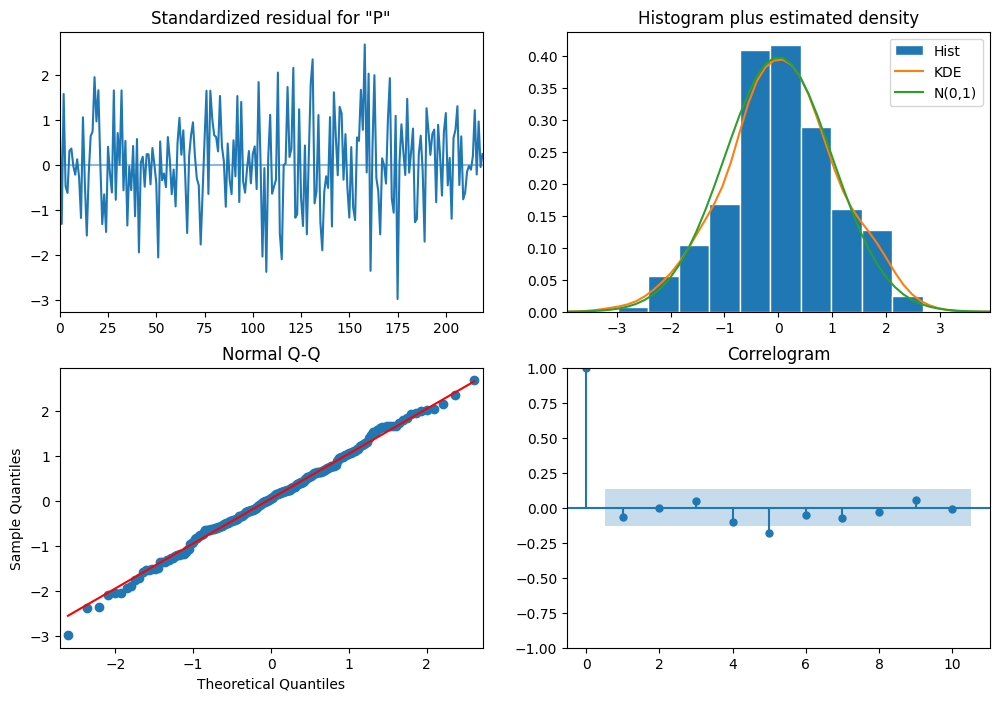

In [19]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(result_2.resid, lags=[10], return_df=True)
print("Ljung_Box Test: \n", ljung_box)

from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(result_2.resid)
print(f"ARCH Test: - p-value: {arch_test[1]:.4f}")

ar_roots = result_2.arroots
ma_roots = result_2.maroots
print("AR roots modulus:", abs(ar_roots))
print("MA roots modulus:", abs(ma_roots))

result_2.plot_diagnostics(figsize=(12, 8))
plt.show()